In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

First, load the data. Since we're given 3 decimal places, I'll assume there's some error beyond that.

In [31]:
gravity = []
altitude = []
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        gravity.append(float(data[2]))

gravity_error = [0.0005] * npoints
print(gravity)

[9.807, 9.804, 9.801, 9.797, 9.794, 9.791, 9.788, 9.785, 9.782, 9.779, 9.776, 9.761, 9.745, 9.73, 9.715, 9.684, 9.654, 9.624, 9.594, 9.564]


Before doing anything else, I want to see what gravity vs. altitude looks like. If I had to guess, it would be something like
$$ g = G\frac{m_e}{r^2} \approx \frac{3.866 \times 10^{14}}{r^2} $$
thanks to Newton, but I'm not sure...

Text(0, 0.5, '$g$ (m/$s^2$)')

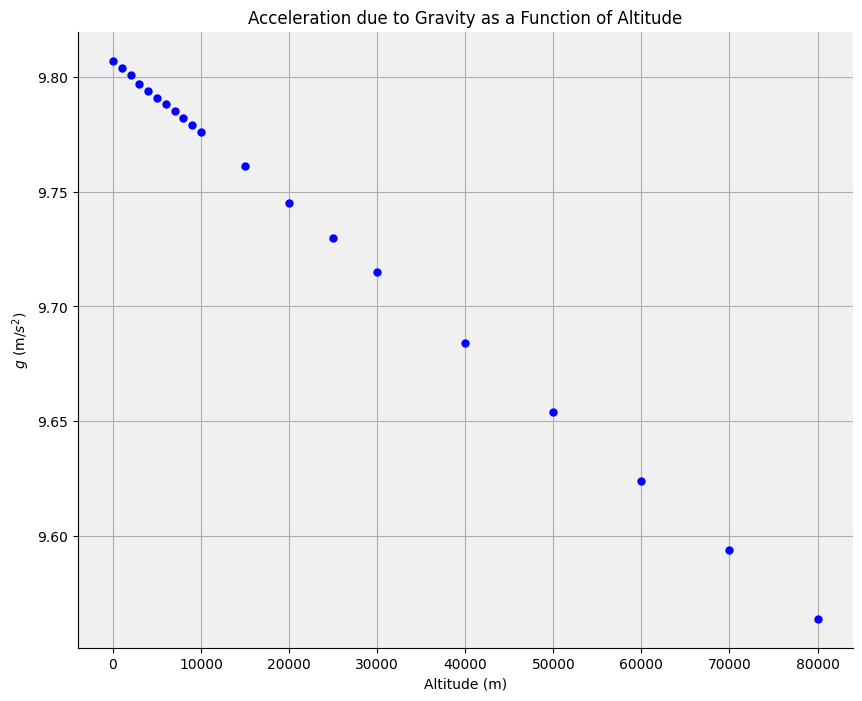

In [32]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5


plt.errorbar(altitude, gravity, yerr=gravity_error, color=line_color, linewidth=line_width,
    marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)


# Set the plot title and axis labels
plt.title("Acceleration due to Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("$g$ (m/$s^2$)")
#plt.yscale("log")

This looks linear... but considering Newton was talking about distances between planets, it could still be the inverse square form. 

In [33]:
def fit_function(x, a):
    return a / (x**2)

One "trick" here is that using the inverse square law as I intend requires the radius of the Earth to be added to the altitude.

In [34]:
earth_radius = 6.357e6

r_from_center = np.array(altitude)
r_from_center += earth_radius

Now do the fit

In [35]:
init_vals = [3.866e14]

popt, pcov = curve_fit(fit_function, r_from_center, gravity, p0=init_vals, sigma=gravity_error, absolute_sigma=True)

print(popt)
print(pcov)

[3.96299921e+14]
[[2.0697932e+19]]


In [36]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fit_function(r_from_center[i],*popt))
    chi2 += (gravity[i]-yfit[i])*(gravity[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.691E-06 / 19


Check the plot

/var/folders/66/z1yrhlyx2_dgq6g1gnl771fr0000gn/T/ipykernel_16989/3776117898.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(altitude, yfit, color='r', label = 'fit: $g=\\frac{%.3E}{a^2}$' % popt)


Text(0, 0.5, '$g$ (m/$s^2$)')

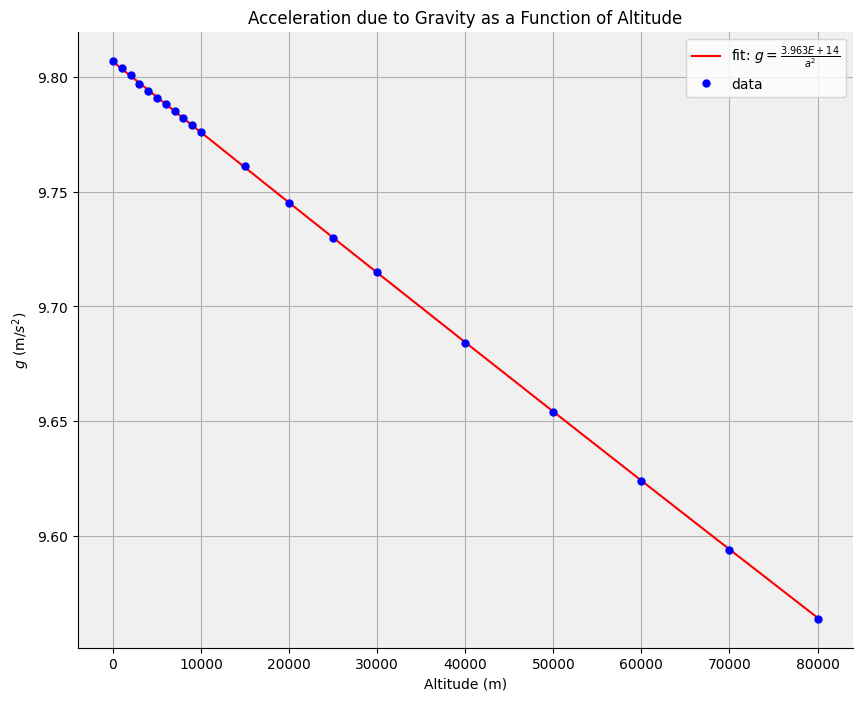

In [39]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties


plt.errorbar(altitude, gravity, yerr=gravity_error, color=line_color, linewidth=line_width,
    marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='data')
plt.plot(altitude, yfit, color='r', label = 'fit: $g=\\frac{%.3E}{a^2}$' % popt)

plt.legend()
# Set the plot title and axis labels
plt.title("Acceleration due to Gravity as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("$g$ (m/$s^2$)")
#plt.yscale("log")

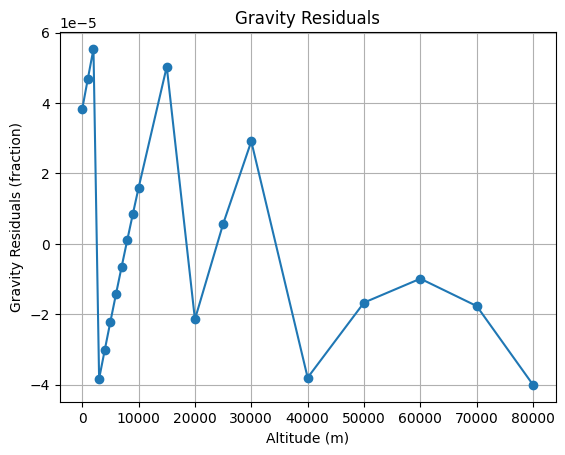

In [38]:
plt.title("Gravity Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Gravity Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (gravity - fit_function(r_from_center, *popt))/gravity, 'o-')

We're at $10^{-5}$ here, so this fit actually looks pretty good. The covariance looks really high (maybe a result of fitting an inverse square function??)